# **Задание 1**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110]) #значения величины заработной платы заемщиков банка
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]) #значения поведенческого кредитного скоринга заемщиков банка
n = 10 #колличество измерений

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная).

Находим коэффициенты линейной регрессии a & b:

In [16]:
x = zp
y = ks
n = 10
b = (np.mean(x * y) - np.mean(x) * np.mean(y)) / (np.mean(x**2) - np.mean(x) ** 2)
a = a = np.mean(y) - b * np.mean(x)

In [17]:
a

444.1773573243596

In [18]:
b

2.620538882402765

Т.о. уравнение линейной регрессии имеет вид:

$y = 444.18 + 2.62 \cdot x$

посчитаем значения, предсказанные моделью:

In [19]:
y_pred = a + b * x
y_pred

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

Найдем коэффициент детерминации  R2 :

In [20]:
R2 = (b * np.std(x) / np.std(y))**2
R2

0.7876386635293682

Визуализируем зависимость (точки - исходные данные, линия - модель)

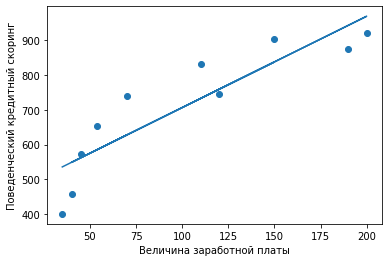

In [22]:
plt.scatter(x,y)
plt.plot(x, y_pred)
plt.xlabel('Величина заработной платы')
plt.ylabel('Поведенческий кредитный скоринг', rotation=90)
plt.show()

Качество модели найдем с помощью средней ошибки аппроксимации $\overline {A}$:

In [23]:
A_mean = 100 * np.mean(np.abs((y - y_pred) / y))
A_mean


11.46925184356171

Так как $\overline {A}$ равна 11,5%, что превышает 8-10 %, модель удовлетворительно описывает эмпирические данные. Для оценки значимости 

уравнения регрессии воспользуемся F-критерием Фишера. Найдем фактическое значение $F$-критерия ($F_{факт}$):

In [24]:
F_fact = (R2 * (n - 2)) / (1 - R2)
F_fact

29.671640859664432

При 5 % уровне значимости и степенях свободы $k_1 = 1$ и $k_2 = 10 - 2 = 8$ табличное значение критерия: $F_{кр} = 5.32$.

Так как $F_{факт} = 29.67 > F_{кр} = 5.32$, уравнение регрессии статистически значимо.

Для оценки статистической значимости параметров регрессии воспользуемся $t$-статистикой Стьюдента и также рассчитаем 

доверительные интервалы каждого из показателей. При $df = n - 2 = 10 - 2 = 8$ и $\alpha = 0.05$ получим:

$t_{кр} = 2.306$

Определим стандартную ошибку $S_{ост}$ (S) и случайные ошибки $m_a, \; m_b$:

In [29]:
S = np.sqrt(np.sum((y - y_pred)**2) / (n - 2))

m_a = S * np.sqrt(np.sum(x ** 2)) / (n * np.std(x))
m_b = S / (np.std(x) * np.sqrt(n))

print('S = {}\nm_a = {}\nm_b = {}'.format(S, m_a, m_b))


S = 89.93340731602925
m_a = 56.466497550681524
m_b = 0.48108279568516


Вычислим наблюдаемые значения критерия $t_a$ и $t_b$:

In [30]:
t_a = a / m_a
t_a

7.866210524668864

In [32]:
t_b = b / m_b
t_b

5.447168150485579

Фактические значения t-статистики больше табличного значения:
$t_a = 7.87 > t_{кр} = 2.306, \; t_b = 5.45 > t_{кр} = 2.306,$
поэтому параметры $a$ и $b$ статистически значимы.

Рассчитаем доверительные интервалы для параметров регрессии $a$ и $b$. Для этого определим предельную ошибку для каждого показателя ($\Delta_a$ и $\Delta_b$)

In [33]:
t = 2.306
delta_a = t * m_a
delta_a

130.2117433518716

In [34]:
delta_b = t * m_b
delta_b

1.109376926849979

Найдем границы доверительных интервалов $\gamma_{a_{min}}, \gamma_{a_{max}}, \gamma_{b_{min}}, \gamma_{b_{max}}$:

In [35]:
gamma_a_min = a - delta_a
gamma_a_min

313.965613972488

In [36]:
gamma_a_max = a + delta_a
gamma_a_max

574.3891006762312

In [37]:
gamma_b_min = b - delta_b
gamma_b_min

1.511161955552786

In [38]:
gamma_b_max = b + delta_b
gamma_b_max

3.729915809252744

Приходим к выводу о том, что с вероятностью $p = 1 - \alpha = 0.95$ параметры $a$ и $b$, находясь в указанных границах, являются статистически значимыми

# **Задание 2**

В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?



Сравнение двух средних выборок при известных дисперсиях осуществляется при помощи функции Лапласа. При неизвестных дисперсиях и, в случае если определение отлично от нормального и большой объем выборки, используется распределение Стьюдента